# Music Recommendation System

## Problem Definition:

**Context:**

Why is this problem important to solve?

Music is part of our identity, it accompanies us from a very young age, attaching to core memories and feelings. As we grow old, most of us tend to develop certain tastes or songs that we will always love to hear. However, as we navigate our daily lives, discovering new music becomes an exciting way to change how every scene of our lives is perceived. A precise, exciting and good music recommendation system is key for bringing novelty and awe to each play.


**Objective:**

What is the intended goal?

It is intended to explore different algorithms to find the best recommendation model for the present data, to later improve the model and obtain the most effective recommendation system

**Key questions:**

There are some key questions that need to be answered.

How does it work?
How good is it?
How does it solve the cod start problem?
What iis the best moddel to use?
SVD?


**The problem formulation:**

What is it that we are trying to solve using data science?

First and foremost, an exploration of the data is absolutely necessary. We need to comprehend the shape and characteristics of the dataframes. We will explore them and use them to train multiple models. From that, we will be able to make predictions on how many plays a song has or how similar it is to other songs. We are trying to create a system that will learn from the users' tastes and will be able to recommend new music.

### **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

### Data Source


http://millionsongdataset.com/



## Importing libraries and the dataset

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install correct version to match libraries
!pip install numpy==1.26.4 scikit-surprise --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 10.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 129.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 21.4 MB/s eta 0:00:00
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2555843 sha256=be24b943df917b4bdfcdc3f17639f4825130a7bdd75a061979ab91172b837f44
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise
  Attempting uninstall: numpy
    Found existing installatio

In [ ]:
# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!unzip '/content/drive/MyDrive/CS/music_rec/Songs_Dataset.zip'

Archive:  /content/drive/MyDrive/CS/music_rec/Songs_Dataset.zip
  inflating: Million Songs Dataset/song_data.csv  
  inflating: Million Songs Dataset/count_data.csv  


In [ ]:
!mv '/content/Million Songs Dataset/' '/content/Million_Songs_Dataset'

### Load dataset

In [ ]:
#importing the datasets
count_df = pd.read_csv('/content/Million_Songs_Dataset/count_data.csv')
song_df = pd.read_csv('/content/Million_Songs_Dataset/song_data.csv')

## Data Exploration

### Understanding Data with observations

#### "Count" Data Frame exploration

In [ ]:
# View dataframe
count_df

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
...,...,...,...,...
1999995,1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2
1999996,1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4
1999997,1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3
1999998,1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


In [ ]:
count_df.shape

(2000000, 4)

In [ ]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


The data has 2 million entries, 3 columns with information and an index, with no missing values.

In [ ]:
# Check value count for song id, we can learn about the songs reproduced by most people
count_df['song_id'].value_counts()

,count
song_id,
SOFRQTD12A81C233C0,8277
SOAUWYT12A81C206F1,7032
SOAXGDH12A8C13F8A1,6949
SOBONKR12A58A7A7E0,6412
SOSXLTC12AF72A7F54,6145
...,...
SOLIGVL12AB017DBAE,51
SOWNLZF12A58A79811,51
SOBPGWB12A6D4F7EF3,50


In [ ]:
# How many songs have each user heard
count_df['user_id'].value_counts()

,count
user_id,
6d625c6557df84b60d90426c0116138b617b9449,711
fbee1c8ce1a346fa07d2ef648cec81117438b91f,643
4e11f45d732f4861772b2906f81a7d384552ad12,556
24b98f8ab023f6e7a1c37c7729c623f7b821eb95,540
1aa4fd215aadb160965110ed8a829745cde319eb,533
...,...
c06b79de331fd6813c55e0c20f6d10f541d3c05d,1
ec40b0f080550c411c11170aa4b66a407b79fe3d,1
ad664b3ce6d30ee189e0d602d2d5f987c4c54929,1


In [ ]:
# Which are the most reproduced songs
count_df.groupby('song_id')['play_count'].sum().sort_values(ascending=False)

,play_count
song_id,
SOBONKR12A58A7A7E0,54136
SOAUWYT12A81C206F1,49253
SOSXLTC12AF72A7F54,41418
SOEGIYH12A6D4FC0E3,31153
SOFRQTD12A81C233C0,31036
...,...
SOAKZQA12A6D4F80C1,76
SOSLEFC12A6D4FC740,75
SOENALO12AB01836F5,73


In [ ]:
# How many songs do we have?
count_df['song_id'].nunique()

10000

In [ ]:
# How many users do we have?
count_df['user_id'].nunique()

76353

In [ ]:
count_df.duplicated().sum()

0

**Observations:**

Although the dataset seems quite large with 2 million entries, it was found that the data contains only 10,000 songs and 76,353 users—almost seven times as many users as songs. The data shows that users have heard up to 711 songs, and songs have been played by up to 8,277 users. We have no duplicated entries.

#### "Song" DataFrame exploration

In [ ]:
# View DataFrame
song_df

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


In [ ]:
song_df.shape

(1000000, 5)

In [ ]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


The data has 10,000 songs. 5 columns, including the index and some entries have missing values on the title or realese.

In [ ]:
song_df.isnull().sum()

,0
song_id,0
title,17
release,7
artist_name,0
year,0


In [ ]:
song_df.duplicated().sum()

498

The data shows missing and duplicated values, which need to be removed in order to continue with the data analysis.

In [ ]:
# We are deleting the missing entries, as they are few
song_df.dropna(subset=['title', 'release'], inplace=True)

In [ ]:
# Drop duplicates
song_df.drop_duplicates(inplace=True)

### Merge Data Frames


In [ ]:
# Merge both dataframes, keeping the integrity of the count data frame
df = pd.merge(count_df, song_df, on='song_id', how = 'left')
df

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...,...
2054529,1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
2054530,1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
2054531,1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
2054532,1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


In [ ]:
# Checking data integrity of the new data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054534 entries, 0 to 2054533
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   user_id      object
 2   song_id      object
 3   play_count   int64 
 4   title        object
 5   release      object
 6   artist_name  object
 7   year         int64 
dtypes: int64(3), object(5)
memory usage: 125.4+ MB


In [ ]:
# We will drop the column "Unamed: 0"
df = df.drop('Unnamed: 0', axis=1)

**Observations:**
- The listening data contains 2,054,534 entries and 7 columns.
- The "play_count" and "year" are both of numeric type data.
- The "song_id" and "user_id" are encrypted, we can use LabelEncoder to perform better on our next steps, using numeric data.
- We have songs that have been listened by no one.

In [ ]:
# Apply label encoding for "user_id" and "song_id"
# Label encoding code
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])

df['song_id'] = le.fit_transform(df['song_id'])

### Data Preparation

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

As many songs have not been listened to, and many users haven't heard many songs, a cutoff will be set to remove users who haven't heard at least 90 songs. For the songs, the cutoff will be set for those that have not been heard by at least 120 users.

In [ ]:
# Setting cut-offs
SONG_COUNT_CUTOFF = 90
LISTENER_COUNT_CUTOFF = 120

In [ ]:
# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [ ]:
remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

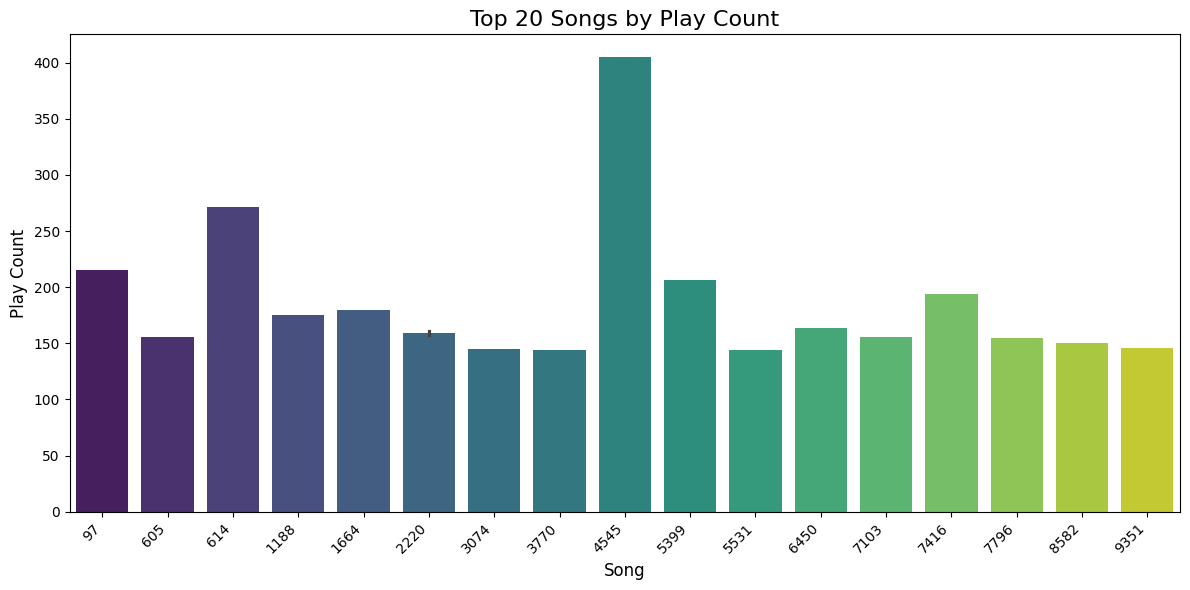

In [ ]:
# Create a table showing the play count for each song
play_count_table = df_final[['song_id', 'play_count']].sort_values(by='play_count', ascending=False)

# For better visualization, limit to top N songs
top_n = 20
top_play_count_table = play_count_table.head(top_n)

# Plot the play count per song
plt.figure(figsize=(12, 6))
sns.barplot(x='song_id', y='play_count', data=top_play_count_table, palette='viridis')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title(f'Top {top_n} Songs by Play Count', fontsize=16)
plt.xlabel('Song', fontsize=12)
plt.ylabel('Play Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [ ]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [ ]:
# Check shape
df_final.shape

(138301, 7)

**Observations:**

Previously, the dataset was enormous, with more than 2 million entries. By setting our cutoffs to include only the relevant items, it was reduced to 138,301 entries. This results in less computational power required and more relevant recommendations.

## Exploratory Data Analysis

### Let's check the total number of unique **users, songs, artists in the data**

In [ ]:
# Unique users
df_final['user_id'].nunique()

3337

In [ ]:
# Unique songs
df_final['song_id'].nunique()

620

In [ ]:
# Unique artists
df_final['artist_name'].nunique()

247

**Observations and Insights:**

The dataset has been significantly reduced; we have gathered the most active users, popular songs, and artists. For user recommendations, they should be effective, and popularity can be used to address the cold start problem. However, for artists, it becomes difficult to be recommended or discovered.

### Let's find out about the most interacted songs and interacted users

In [ ]:
# Most interacted songs
df_final.groupby('song_id')['play_count'].sum().sort_values(ascending=False)

,play_count
song_id,
8582,3126
6293,2216
1286,1774
3567,1762
352,1752
...,...
6121,157
2207,155
9328,154


In [ ]:
df_final['song_id'].value_counts()

,count
song_id,
8582,1602
6293,1264
3567,982
4270,960
1286,920
...,...
8324,103
7747,99
4831,98


The most reproduced song, it is also the most popular among different users.

In [ ]:
# Most interacted users
df_final.groupby('user_id')['play_count'].sum().sort_values(ascending=False)

,play_count
user_id,
3237,631
15733,501
62759,479
43041,459
27401,448
...,...
17961,2
58702,2
33657,1


In [ ]:
df_final['user_id'].value_counts()

,count
user_id,
61472,282
15733,240
37049,237
9570,204
10763,199
...,...
33657,1
17961,1
14439,1


We have some users that have heard the same songs many times and users with more variety in their tastes.

**Songs released on yearly basis**

In [ ]:
# count of the songs in an year using the title count
count_songs = song_df.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace = True)
count.tail()

,title
year,
2007,39368
2008,34714
2009,31011
2010,9392
2011,1


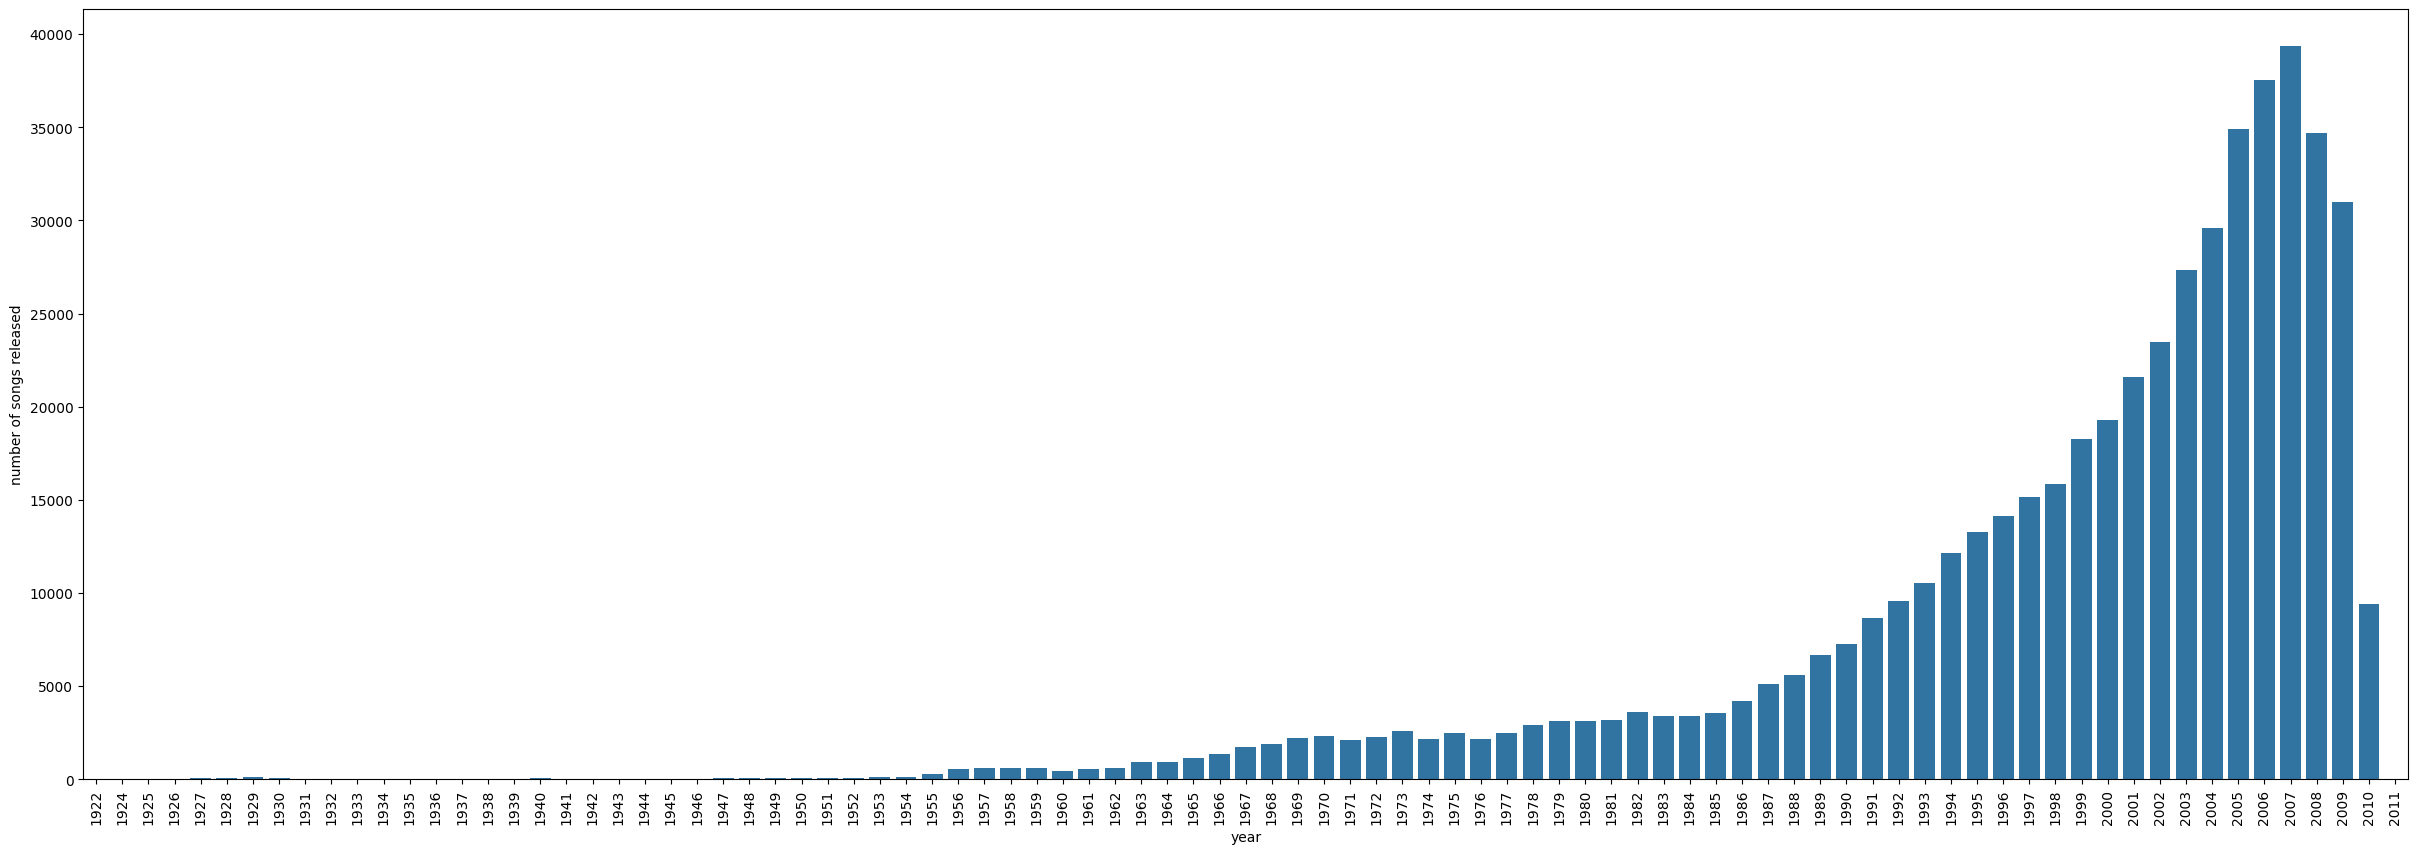

In [ ]:
plt.figure(figsize = (30,10))
ax = sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median,)
for item in ax.get_xticklabels(): item.set_rotation(90)
plt.ylabel('number of songs released')
# Show the plot
plt.show()

**Observations and Insights:**


The data shows an exponential growth in the amount of songs released throughout the years, with a peak on 2007, and decreasing the next years.

In [ ]:
# Most popular artist
popular_artist = df_final.groupby('artist_name')['play_count'].sum().sort_values(ascending=False)
popular = pd.DataFrame(popular_artist)
popular.drop(popular.index[0], inplace = True)
popular.head()

,play_count
artist_name,
Kings Of Leon,7560
The Killers,6335
Florence + The Machine,5701
Justin Bieber,4778
Muse,4020


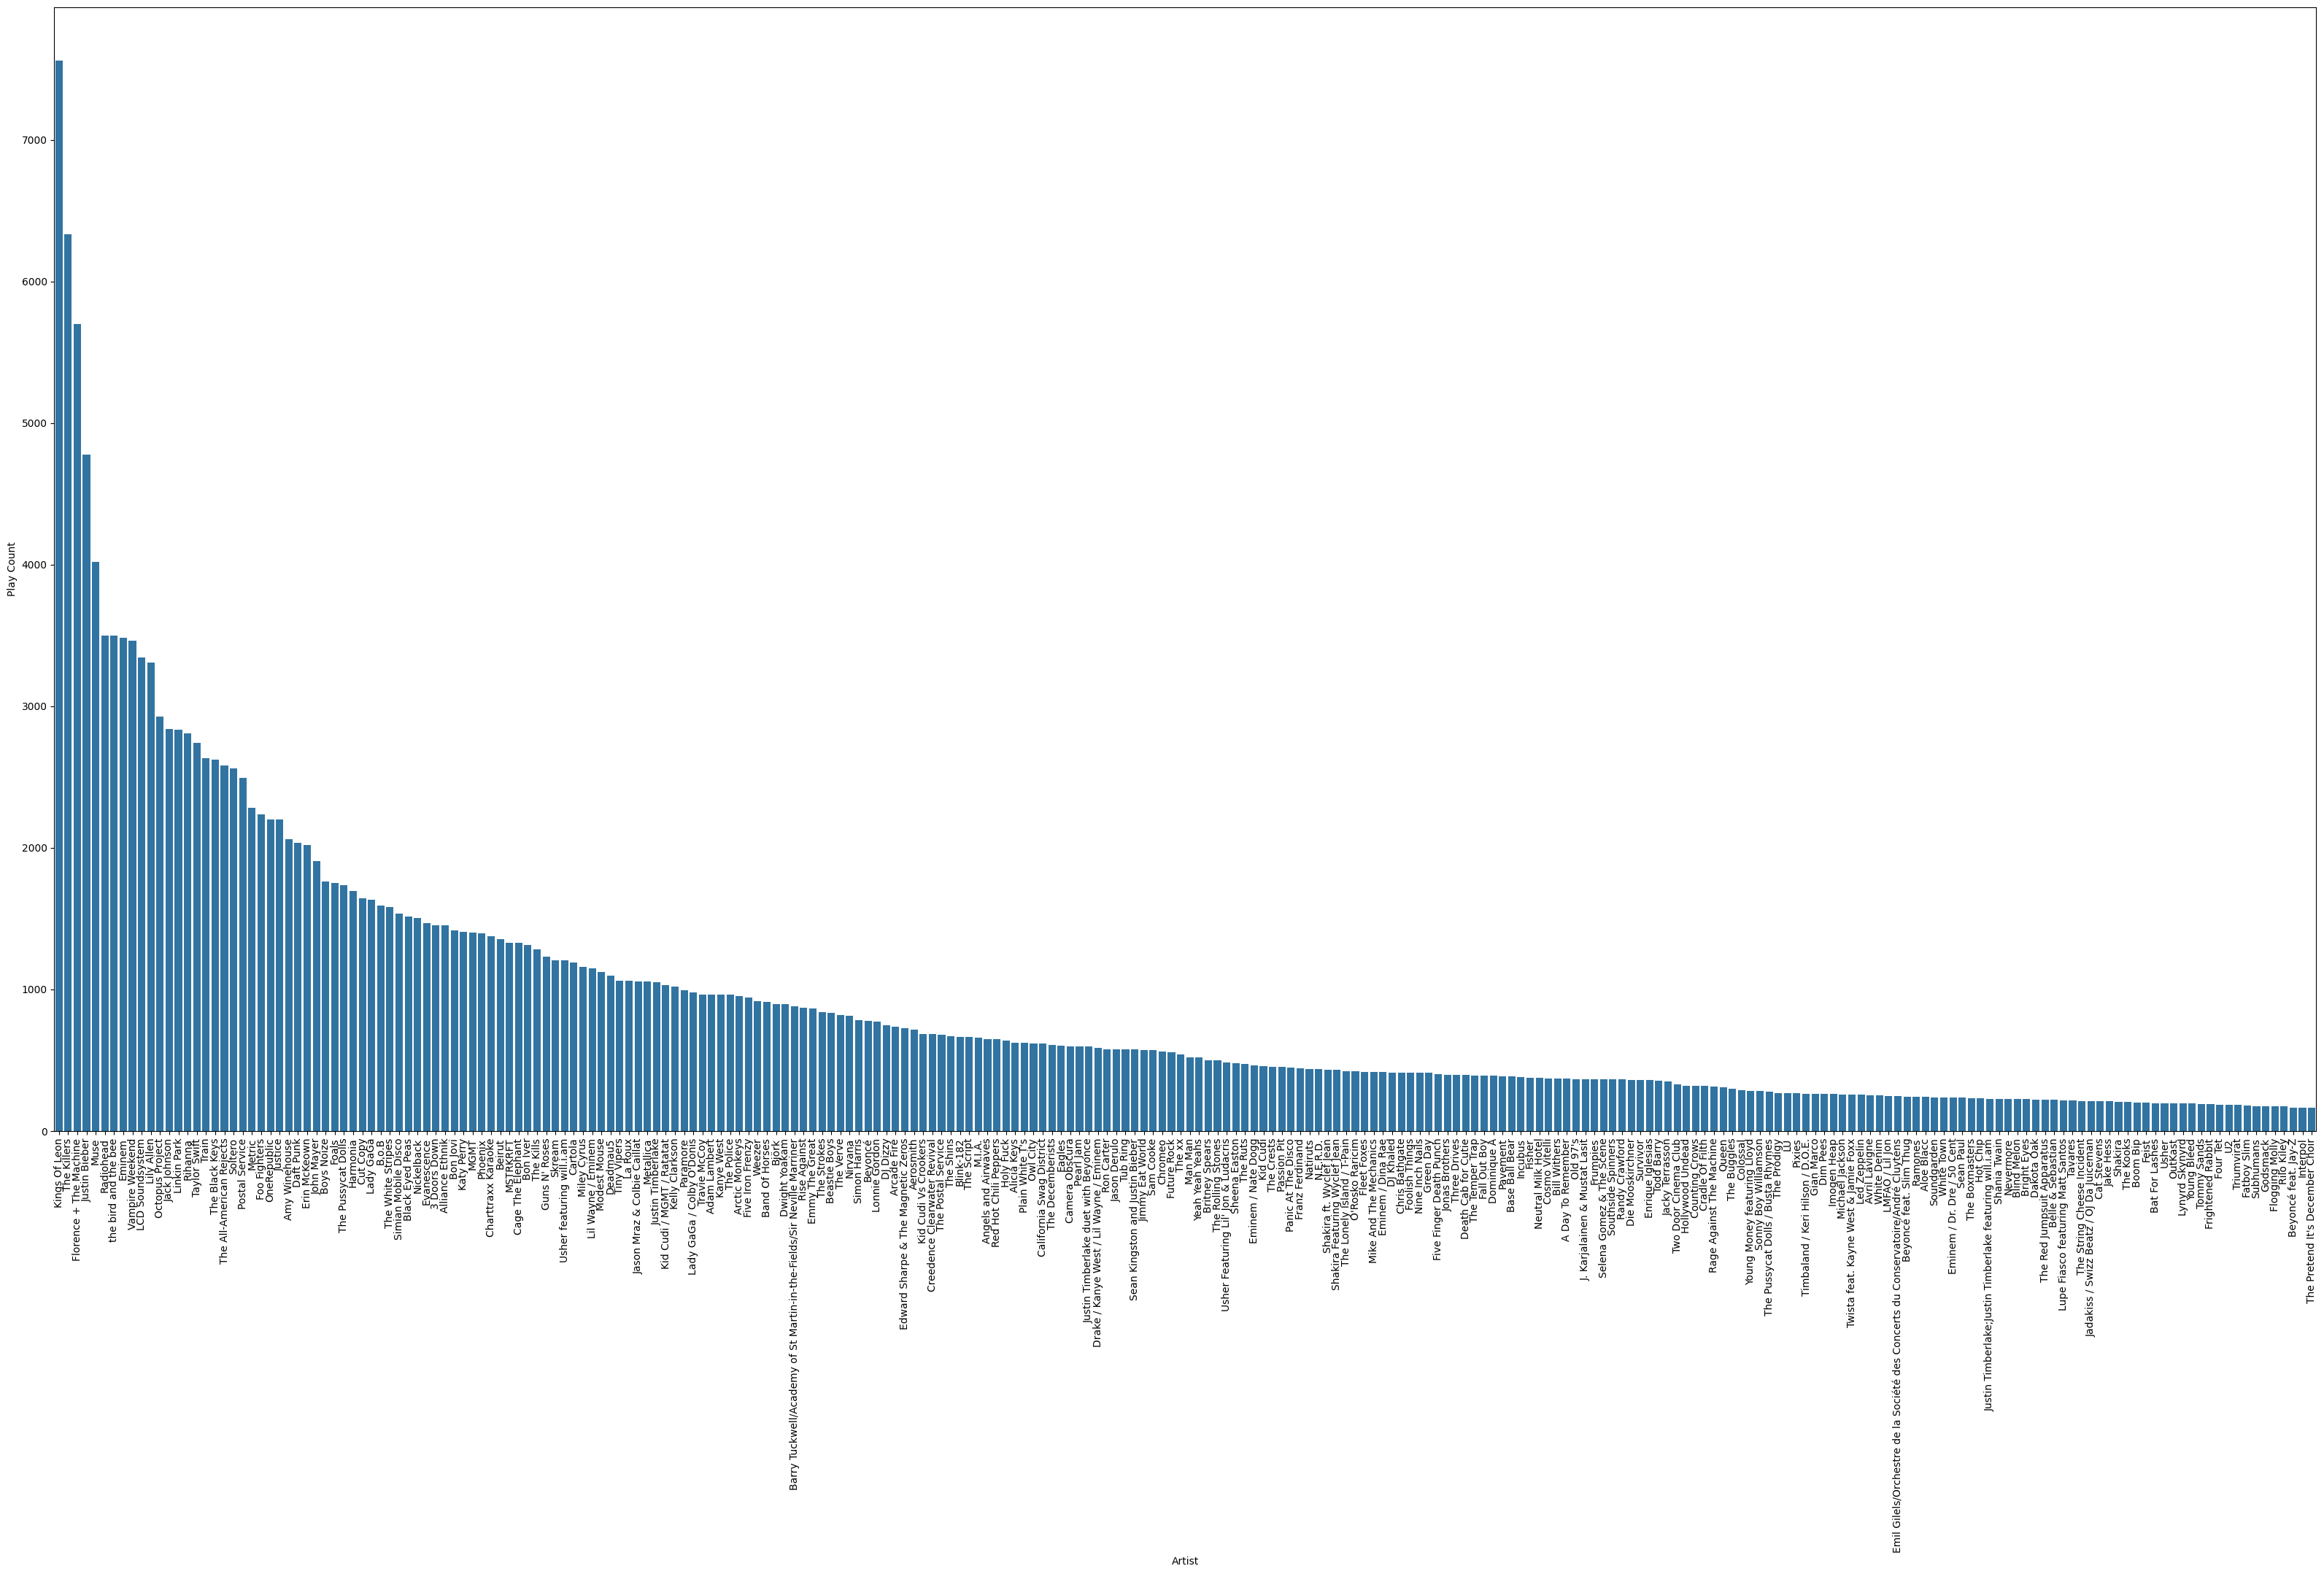

In [ ]:
plt.figure(figsize = (40,20))
ax = sns.barplot(x = popular.index,
            y = 'play_count',
            data = popular,
            estimator = np.median,)
for item in ax.get_xticklabels(): item.set_rotation(90)
plt.ylabel('Play Count')
plt.xlabel('Artist')
# Show the plot
plt.show()

**Observations and Insights:**

It is observed how the most popular artist gather many of the play counts, and then it drops exponencially.

Kings if leon, The killers, Florence, Justin Bieber and Muse are the most popular artists.

### Important Insights from EDA

- Although the dataset seems quite large with 2 million entries, we only have 10,000 songs and 76,353 users. We have almost seven times as many users as songs. We have users who have heard up to 711 songs and songs that have been played by up to 8,277 users. We have no duplicated entries.

- We had missing and duplicated values in our song_df. We removed them in order to continue with the data analysis.

- Once the dataframes were merged, the listening data contained 2,054,534 entries and 7 columns.

- The "play_count" and "year" are both numeric data types. The "song_id" and "user_id" are encrypted; we can use LabelEncoder to improve performance in our next steps, using numeric data to enhance computational efficiency.

- We have songs that have been listened to by no one. We considered a cutoff on songs with at least 120 replays and users who have heard at least 90 songs. We also have songs with a play_count of 5 or fewer, which account for almost 90% of the dataset. So, for building the recommendation system, let us consider only those songs to avoid bias from users who listen to the same song too many times.

- We previously had an enormous dataset with more than 2 million entries. By setting our cutoffs to include only the relevant items, we have reduced it to 138,301 entries—less computational power and more relevant recommendations.

- The dataset has been significantly reduced; we have gathered the most active users, popular songs, and artists. For user recommendations, they should be effective; popularity can be used to address the cold start problem. For artists, it becomes difficult to recommend or discover them.

- The most reproduced song is also the most popular among different users.

- We have some users who have heard the same songs many times and others with more variety in their tastes.

- We can see exponential growth in the number of songs released throughout the years, with a peak in 2007, followed by a decrease in the following years.

- We can see how the most popular artists account for many of the play counts, and then it drops exponentially.

- Kings of Leon, The Killers, Florence + The Machine, Justin Bieber, and Muse are the most popular artists.

## Model building

### Popularity-Based Recommendation Systems




Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean()

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id')['play_count'].count()

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count': average_count, 'play_freq': play_freq})

# Let us see the first five records of the final_play dataset
final_play.head(5)

,avg_count,play_freq
song_id,,
21,1.631387,274
22,1.464286,140
50,1.616822,107
52,1.715232,453
62,1.727273,121


In [ ]:
final_play.describe()

,avg_count,play_freq
count,620.000000,620.000000
mean,1.650890,223.066129
std,0.217471,156.576863
min,1.238994,87.000000
25%,1.493589,129.750000
50%,1.624298,163.500000
75%,1.771966,251.250000
max,3.366972,1602.000000


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

This is great for a cold start problem.

In [ ]:
# Build the function to find top n songs

def top_n_songs(data, n, min_interaction=100):

  # Songs with minimum recommendations
  recommendations = data[data.play_freq > min_interaction]
  # Sort the values
  recommendations = recommendations.sort_values(by='avg_count', ascending=False)

  # Get top song Ids
  top_song_ids = recommendations.index[:n]

  # Map song Ids
  song_titles = []

  for song_id in top_song_ids:
    title = df[df['song_id'] == song_id]['title'].unique()[0]
    song_titles.append(title)
  return song_titles

In [ ]:
# Use function
top_n_songs(final_play, 10, 100)

['Victoria (LP Version)',
 'Brave The Elements',
 'The Big Gundown',
 'Greece 2000',
 'Video Killed The Radio Star',
 'Secrets',
 'Luvstruck',
 'Transparency',
 "You're The One",
 'Sehr kosmisch']

We succesfully obtained out top songs, based on pupularity and how many people have heard it. Very useful, quick, and easy solution for a cold start problem.

### User User Similarity-Based Collaborative Filtering

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Installing the surprise package using pip.
!pip install surprise

In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise.prediction_algorithms.co_clustering import CoClustering


#### Precision and recall function

In [ ]:
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)

    #Command to print the overall precision
    print('Precision: ', precision)

    #Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score.
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3))

In [ ]:
# Create copy for further use
df_song = df_final.copy()

In the function precision_recall_at_k above the threshold value used is 1.5.

The threshold will only allow certain items to enter the function. If we have a higher threshold, we could miss relevant items, and if it is too low, the precision will fall as the recommendations will not be very good. Overall, the F1 score will drop.

The median of replays is around 1.6, so we can set a good threshold at 1.5, as it is moderate.

We are loading the dataset, which is a pandas dataframe, into a different format called surprise.dataset.DatasetAutoFolds which is required by this library. To do this we will be using the classes Reader and Dataset

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale= (0,5))

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42)

If the model has a large portion on the training data, it might overtfit or get a less reliable evaluation. With this size, we expect it to perform as a real escenario.


In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user)

RMSE: 1.0817
Precision:  0.401
Recall:  0.705
F_1 score:  0.511


**Observations:**
This is our first trained model. A good RMSE is showing; the precision is kind of low, which means that we are giving some recommendations that should not be there. The recall is reasonable, and it seems that we are being sort of easy on the recommendations. The F1 score is medium. These scores can be improved, so let’s explore the rest of the models and how well we can tune their parameters.

In [ ]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.72   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.7227331119335394, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.68   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6776559989382887, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
The predictions are not great, let's try to tune the model.

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

In [ ]:
# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=1)

In [ ]:
# Fitting the data
gs.fit(data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...

In [ ]:
# Best RMSE score
gs.best_score['rmse']

1.002330315272493

In [ ]:
gs.best_score

{'rmse': 1.002330315272493, 'mae': 0.7331962519226966}

In [ ]:
# Combination of parameters that gave the best RMSE score
gs.best_params['rmse']

{'k': 30,
 'min_k': 9,
 'sim_options': {'name': 'pearson_baseline',
  'user_based': True,
  'min_support': 2}}

{'k': 30,
 'min_k': 9,
 'sim_options': {'name': 'pearson_baseline',
  'user_based': True,
  'min_support': 2}}

In [ ]:
# Update our similarity options
sim_options = {
    'name': 'pearson_baseline',
    'user_based': True,
    'min_support': 2
}

# Creating an instance of KNNBasic with optimal hyperparameter values
similarity_algo_optimized = KNNBasic(k=30, min_k=9, sim_options = sim_options, verbose = False)

In [ ]:
# Training the algorithm on the train set
similarity_algo_optimized.fit(trainset)

In [ ]:
# Compute precision and recall
precision_recall_at_k(similarity_algo_optimized)

RMSE: 1.0136
Precision:  0.443
Recall:  0.736
F_1 score:  0.553


**Observations and Insights:**

Comparing the optimized algorithm, our RMSE reduced by 0.07, or precision increased by 0.04, and our recall 0.3.

Our F_1 Score incresed from 0.51 to 0.55.


Even though our algorithm was better, the increase was minimal.

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
similarity_algo_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.95   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9453672719637054, details={'actual_k': 24, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
similarity_algo_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.698939503494818, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Observations and Insights:**

The prediction for the first test was really close. Unfortunately, the optimized values for the neighbors did not allow the second recommendation to work. It could not find enough neighbors to make a prediction. Therefore, this model does not work well for our interests

In [ ]:
 # Finding the 5 closest neighbors to a song
similarity_algo_optimized.get_neighbors(0, k=5)

[693, 27, 1387, 760, 1799]

Below we will be implementing a function where the input parameters are:

- data: A song dataset
- user_id: A user-id against which we want the recommendations
- top_n: The number of songs we want to recommend
- algo: The algorithm we want to use for predicting the play_count
- The output of the function is a set of top_n items recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count', aggfunc = 'sum')

    # Extracting those song ids which the user_id has not played yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the play_counts for those non played song ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted play_counts
        recommendations.append((item_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    # Returing top n highest predicted play_count songs for this user
    return recommendations[:top_n]

In [ ]:
# Drop duplicates
df_song = df_song.drop_duplicates()

In [ ]:
df_song

,user_id,song_id,play_count,title,release,artist_name,year
206,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
208,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
209,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
210,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
211,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
2054259,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0
2054261,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
2054270,47786,9351,2,The Police And The Private,Live It Out,Metric,2005
2054280,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006


In [ ]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(df_song, 6958, 5, similarity_algo_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,3165,2.652562
1,6716,2.638973
2,9019,2.626063
3,1348,2.605952
4,4134,2.532803


**Observations and Insights:**

An optimal function to get recommendations has been created. Due to the nature of the model, items without enough neighbors will be skipped; this could affect the potential recommended songs.

### Correcting the play_counts and ranking the above songs

In [ ]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts
  ranked_songs = playing_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)

  return ranked_songs

The formula penalizes less popular songs by subtracting more if the song is less popular. This will recommend songs listened to and approved by more users, giving better confidence in the recommendations. If we were looking for a discovery algorithm that boosts smaller artists, then we would add the quantity, as the recommendation would be higher if the song has fewer replays.




In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
2,3165,368,2.652562,2.600433
1,9019,464,2.626063,2.579639
3,6716,188,2.638973,2.566040
0,1348,487,2.605952,2.560638
4,4134,139,2.532803,2.447984


**Observations and Insights:**
As the song has a higher play frequency, it will be recommended more. This correction will give the user a more precise and better recommendation.

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': False}

In [ ]:
# KNN algorithm is used to find desired similar items
algo_knn_item = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

In [ ]:
# Train the algorithm on the trainset, and predict play_count for the testset
algo_knn_item.fit(trainset)

In [ ]:
precision_recall_at_k(algo_knn_item)

RMSE: 1.0320
Precision:  0.316
Recall:  0.572
F_1 score:  0.407


**Observations and Insights:**

Precision, recall, and F-1 score decreased by a considerable amount, meaning that Item-Item similarity might not be our best option from the start. Precision dropped to 0.3 and recall from 0.7 to 0.57. Naturally, this affected the F-1 score. The predictions will not be good.

In [ ]:
# Predicting play_count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
algo_knn_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.37   {'actual_k': 18, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3695958289911163, details={'actual_k': 18, 'was_impossible': False})

In [ ]:
# Check if user  has listened to song 1671
has_listened = ((df_song['user_id'] == 1) & (df_song['song_id'] == 1671)).any()
has_listened

False

In [ ]:
# Predict the play_count for a user that has not listened to the song (with song_id 1671)
algo_knn_item.predict(1, 1671, verbose = True)

user: 1          item: 1671       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1, iid=1671, r_ui=None, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:**

 For this instance, it is possible that user 1 was not part of the training data. The prediction for the user that did not hear that song is impossible. On the other hand, the count prediction for the song performed badly. Let's explore how different parameters could affect our model.


In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

In [ ]:
# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=1)

In [ ]:
# Fitting the data
gs.fit(data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...

In [ ]:
# Find the best RMSE score
gs.best_score

{'rmse': 0.9909960932296599, 'mae': 0.6951359508924875}

In [ ]:
# Extract the combination of parameters that gave the best RMSE score
gs.best_params

{'rmse': {'k': 30,
  'min_k': 3,
  'sim_options': {'name': 'pearson_baseline',
   'user_based': False,
   'min_support': 2}},
 'mae': {'k': 10,
  'min_k': 3,
  'sim_options': {'name': 'pearson_baseline',
   'user_based': False,
   'min_support': 2}}}

Our hyperparameters will affect our recommendation system; we are having a considerable number of neighbors for making predictions. Thirty most similar songs are considered, and at least 3 should be included for making a prediction. Pearson baseline will account for biases on rather popular songs or dedicated music listeners before calculating similarity. This tuning and selection of special parameters should improve our model.

In [ ]:
# Creating an instance of KNNBasic with optimal hyperparameter values
similarity_algo_optimized_item = KNNBasic(k=30, min_k=3, sim_options = {'name': 'pearson_baseline', 'user_based': False})

In [ ]:
# Apply the best model found in the grid search
similarity_algo_optimized_item.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
# Compute precison and recall
precision_recall_at_k(similarity_algo_optimized_item)

RMSE: 1.0050
Precision:  0.449
Recall:  0.606
F_1 score:  0.516


**Observations and Insights:**

Our scores increased significantly with our hyperparameters adjusted. It still falls slightly behind our user-based model; however, the RMSE is better.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
similarity_algo_optimized_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.06   {'actual_k': 6, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=2.0566954344862127, details={'actual_k': 6, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
similarity_algo_optimized_item.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.15   {'actual_k': 9, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1533222731105461, details={'actual_k': 9, 'was_impossible': False})

**Observations and Insights:**

The predictions have improved; it overestimated the first prediction by a little bit, and for the second one, it was very different from our previous model, giving a lower score.

In [ ]:
# Find five most similar items to the item with inner id 0
similarity_algo_optimized_item.get_neighbors(0, k=5)

[199, 166, 196, 288, 10]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_song, 6958, 5, similarity_algo_optimized_item)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2210,3.827103
1,9019,3.129729
2,4366,2.766942
3,5223,2.666665
4,5291,2.506365


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
2,2210,357,3.827103,3.774178
0,9019,464,3.129729,3.083305
3,4366,164,2.766942,2.688855
4,5223,130,2.666665,2.578960
1,5291,410,2.506365,2.456978


**Observations and Insights:**

The tuned item-item model performed worse in the F_1 score than the user-user model; however, our second model did not find an impossible prediction. The F-1 score was lower by 0.04, and the model was able to make our necessary predictions. It has better coverage and a great RMSE, making precise predictions. The final recommended songs are very different from the first model, only having in common song 9019.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a personalized recommendation system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use latent features to find recommendations for each user.

In [ ]:
# Build baseline model using svd
svd = SVD(random_state = 1)

In [ ]:
# Training the algorithm on the train set
svd.fit(trainset)

In [ ]:
# Compute precision and recall
precision_recall_at_k(svd)

RMSE: 1.0026
Precision:  0.432
Recall:  0.654
F_1 score:  0.52


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.33   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3330243078163533, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.30   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2983047805615977, details={'was_impossible': False})

**Observations and Insights:**

Our scores are more balanced; we got a better RMSE and F-1 score. Even though the 1.33 over the actual 2 might seem like a bad prediction, it is important to understand that SVD works slightly differently; we can have more trust in the underlying patterns and the rank that is given to the songs. We have better discovery with our recall of 0.65. Let's see how the score can be improved with hyperparameter tuning.

In [ ]:
# Set the parameter space to tune
param_grid = {
    'n_epochs':  [10,20,30],
    'lr_all': [0.001, 0.005, 0.01],
    'reg_all': [0.2, 0.4, 0.6]
}

In [ ]:
# Performe 3-fold grid-search cross-validation
# Performing 3-fold gridsearch cross validation
gs_ = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=1)

In [ ]:
# Fitting data
gs_.fit(data)

In [ ]:
# Best RMSE score
gs_.best_score

{'rmse': 1.0035739337464744}

In [ ]:
# Combination of parameters that gave the best RMSE score
gs_.best_params

{'rmse': {'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}}

Our number of epochs will determine how long the training takes and how many stages there are; 30 is usually good for thorough learning. Our learning rate is 0.01, which will give slow but steady, reliable learning. And finally, our regularization strength is light. We might be able to tune even further our model if we choose this as the final model. Let's see how it behaves.

In [ ]:
# Building Optimized SVD
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

In [ ]:
# Training the algorithm on the train set
svd_optimized.fit(trainset)

In [ ]:
# compute precision and recall
precision_recall_at_k(svd_optimized)

RMSE: 1.0085
Precision:  0.414
Recall:  0.645
F_1 score:  0.504


**Observations and Insights:**

The model actually decreased in every metric; this could indicate overfitting in the training data. The default parameters are generalizing better on the test data.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui= 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.28   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2838400390467517, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.40   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3997025482649297, details={'was_impossible': False})

**Observations and Insights:**

Both predictions were possible; however, the prediction for the known song was not on point. This insight can indicate that our SVD model will work better for underlying patterns and top songs rather than provide exact predictions for the user. With careful tuning, we might be able to improve the model; however, the default parameters performed better than our tuned grid search parameters.

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_song, 6958, 5, svd_optimized)

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,7224,109,2.811510,2.715727
2,6450,110,2.183207,2.087861
3,5653,110,2.112904,2.017557
0,5531,664,1.974058,1.935250
1,9942,159,1.990067,1.910762


**Observations and Insights:**

Not one song from the previous top 5 songs is present here. This top songs list will be better to explore in an F-1 score optimized algorithm. We'll see how the next models develop, choose one, and tune it to the highest potential.

In [ ]:
svd_optimized2 = SVD(n_epochs = 15, lr_all = 0.0015, reg_all = 0.8)

In [ ]:
svd_optimized2.fit(trainset)

In [ ]:
precision_recall_at_k(svd_optimized2)

RMSE: 1.0358
Precision:  0.401
Recall:  0.825
F_1 score:  0.54


After careful tuning, we were able to approach a model with a reasonable balance between the RMSE and F-1 score. This will improve the discovery of new songs; however, the recommendations will be less precise. As we are aiming toward better RMSE scores, our best option so far is the original SVD model.

### Cluster Based Recommendation System

In [ ]:
# Import necessary libraries
from surprise import CoClustering

In clustering-based recommendation systems, we explore the similarities and differences in people's tastes in music based on how they listen to different songs. We cluster similar users together and recommend songs to a user based on ratings from other users in the same cluster.

Co-clustering is a set of techniques in Cluster Analysis. Given some matrix A, we want to cluster rows of A and columns of A simultaneously, this is a common task for user-item matrices.

As it clusters both the rows and the columns simultaneously, it is also called bi-clustering. To understand the working of the algorithm, let A be m x n matrix, the goal is to generate co-clusters: a subset of rows that exhibit similar behavior across a subset of columns, or vice versa.

Co-clustering is defined as two map functions:

rows -> row cluster indexes columns -> column cluster indexes.

These map functions are learned simultaneously. It is different from other clustering techniques where we cluster first the rows and then the columns.



#### Creating baseline clustering model

In [ ]:
# Creating the algorithm
clust_baseline = CoClustering(random_state = 1)

In [ ]:
# Training
clust_baseline.fit(trainset)

In [ ]:
# Precision and recall computing
precision_recall_at_k(clust_baseline)

RMSE: 1.0428
Precision:  0.398
Recall:  0.594
F_1 score:  0.477


**Observations and insights:**

From our first insight, the model did not perform as expected, with lower scores on all measures. Let's see how the predictions are made and how well it can improve.



In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3627795906030837, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.55   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5488944215348255, details={'was_impossible': False})

**Observations and insights:**

The predictions fell short, even though they were both possible, and the second was not far from other models.


#### Improving clustering-based recommendation system by tuning its hyper-parameters

Below, we will be tuning hyperparameters for the CoClustering algorithm. Let's try to understand the different hyperparameters of this algorithm.

- n_cltr_u (int) – Number of user clusters. The default value is 3.
- n_cltr_i (int) – Number of item clusters. The default value is 3.
- n_epochs (int) – Number of iteration of the optimization loop. The default value is 3.
random_state (int, RandomState instance from NumPy, or None) – Determines the RNG that will be used for initialization. If int, random_state will be used as a seed for a new RNG. This is useful to get the same initialization over multiple calls to fit(). If RandomState instance, this same instance is used as RNG. If None, the current RNG from NumPy is used. The default value is None.
- verbose (bool) – If True, the current epoch will be printed. The default value is False.

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}


In [ ]:
# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

In [ ]:
# Fitting data
gs.fit(data)

In [ ]:
# Print the best RMSE score
print(gs.best_score['rmse'])

1.0479912751128984


In [ ]:
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


Now we will build our finall tuned model

In [ ]:
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5,n_cltr_i = 5, n_epochs = 10, random_state = 1)

In [ ]:
# Training the algorithm on the train set
clust_tuned.fit(trainset)

In [ ]:
# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0617
Precision:  0.399
Recall:  0.561
F_1 score:  0.466


**Observations and Insights:**

The model performed even worse for every metric. This model is not a good choice for the problem.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.43   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.43338956866177, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.12   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1162002534531466, details={'was_impossible': False})

**Observations and Insights:**

Once again, the predictions were bad, as expected.

#### Implementing the optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_song, 6958, 5, clust_tuned)

In [ ]:
recommendations

[(7224, 3.526386124344893),
 (352, 2.31558546387285),
 (6246, 2.2495938561775333),
 (6450, 2.1594089926233044),
 (4831, 2.102345612617814)]

#### Correcting the Ratings and Ranking the above restaurants

In [ ]:
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
3,7224,109,3.526386,3.430603
0,352,802,2.315585,2.280274
1,6246,434,2.249594,2.201592
2,6450,110,2.159409,2.064063
4,4831,98,2.102346,2.001330


**Observations and Insights:**

Only the top recommendation was in the previous model. We can discard this cluster model.

### Content Based Recommendation Systems



So far, we have only worked with the play count of the songs. However, many other features can provide good insight into what the user will like. In music, users tend to like artists, songs, and albums. We can use these features to recommend songs as well.

In a content-based recommendation system, we would be using the feature - text, i.e., reviews to find out similar songs.

Text data generally contains pronunciation, stopwords, non-ASCII characters which makes it very noisy. So, we will first need to pre-process the text and then we will generate features from the text to compute similarities between the texts/reviews.

#### Necessary libraries

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")
nltk.download('punkt_tab')

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Funtion to preprocess the data
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

#### Data Preparation

In [ ]:
df_small = df_final

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + " " + df_small['release'] + " " + df_small['artist_name']

In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_content = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

In [ ]:
# Drop the duplicates from the title column
df_content.drop_duplicates(subset = ['title'], inplace = True)

In [ ]:
# Set the title column as the index
df_content = df_content.set_index('title')

In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_content.index)

# # See the first 5 records of the df_content dataset
indices[ : 5]

,title
0,Daisy And Prudence
1,The Ballad of Michael Valentine
2,I Stand Corrected (Album)
3,They Might Follow You
4,Monkey Man


#### Model Building

In [ ]:
# Create the TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

In [ ]:
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
review_tfidf = tfidf.fit_transform(df_content['text'].values).toarray()

In [ ]:
# Let us view the review_tfidf dataframe
pd.DataFrame(review_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


**Observations and Insights:**

We have created the vector representations of our songs features. Now it is just necessary to find the similarity between them.

In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_review = cosine_similarity(review_tfidf, review_tfidf)
similar_review

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03257364],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03257364, ..., 0.        , 0.        ,
        1.        ]])

#### Recommendations

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_content.index)[i])

    return recommended_songs

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_review)

[445, 520, 246, 465, 367, 429, 0, 416, 417, 418]


['Big Me',
 'Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Daisy And Prudence',
 "Ghosts 'n' Stuff (Original Instrumental Mix)",
 'Closer',
 'No Cars Go']

**Observations and Insights:**

The songs are very similar and actually good recommendations. This system is great for discovery radios from a particular song.

## Conclusion and Recommendations

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**

Important differences were noticed between the models and techniques, mostly noticed in how the RMSE and recommendations showed up. Our first step on the user-based model was not bad, with an RMSE of 1.08, later tuned to obtain a 1.01 and a very good F-1 score of 0.55. Later, our tuned item-based model improved the RMSE to 1.005, performing way better and with a solid F-1 score of 0.51. Our SVD model initially had our best scores, with an RMSE of 1.002 and an F-1 score of 0.52, improving in both metrics compared to the previous models. However, when optimizing it, overfitting in the training data happened. Our RMSE decreased to 1.008 and the F-1 score to 0.5. Further tuning was made on this promising model; the tradeoff between RMSE and F-1 score was clear; we could increase the recall and F-1 score at the cost of getting a worse RMSE. We finally obtained a model with an RMSE of 1.03, a recall of 0.85, and an F-1 score of 0.54. This model would work great in production if we are aiming for a more broad music discovery system.

Another model that we worked with was the Co-Clustering model, which performed poorly in every way for this dataset.

Finally, our content-based model worked well. It is different from our previous models, as it will only recommend similar items per item mentioned. This alone would work great as a radio discovery algorithm, or as a starting point in a cold start problem.




**2. Refined insights:**

The original dataset was enormous; it is quite relevant to mention that a great part of it was cut off because that information was not valuable for our problem. There were either too few plays per song or too few songs listened to by users. This means that a great part of the users could be handled as a cold-start problem during production. This also means that many songs were cut off; we could see an exponential growth in the comparison of songs with replays, meaning that songs with fewer plays are less likely to be discovered. This means that a bias will be present in our recommendation system due to the nature of the dataset and the cutoffs we set for the performance of our models. Of course, the nature of the model will depend on our objectives, whether it is to provide super accurate predictions, a broad and rich discovery playlist, or give small artists a better chance of being discovered.

As the data only presented users, their replays, and information from the song, our first models only considered the play count from the users. This gave good results in SVD and item-based recommendations, because the music taste is diverse; the latent features were extracted, or similar songs showed up.

The Co-Clustering model was too rigid in the songs it recommended. Also, the dataset was of play count and not ratings, causing the algorithm to not work as expected.




**3. Proposal for the final solution design:**

Our best model was our original SVD model. It had the best RMSE score and a very decent F-1 score. It is precise in the recommendations and provides valuable recommendations for discovery; however, we can further improve the system in the future by building a hybrid recommendation system. Combining the SVD and content-based model would be beneficial, as they would compensate for their weaknesses—handling cold-start problems, being precise with recommendations, and giving the best options for discovery.